In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression

sns.set()


In [7]:
#open NVIDEA Yahoo Finance historical data
df = pd.read_csv('NVDA.csv')


#clean data: 
#first, clean the data of any NA values
orig = df.shape[0]
df.dropna(inplace=True)

#check for how many values disapeared 

count = orig - df.shape[0]

print(count)
df.head()
#clearly no values were dropped from our dataset


0


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-08,377.239990,388.640015,375.049988,385.100006,385.016388,41777200
1,2023-06-09,390.369995,397.109985,385.670013,387.700012,387.615814,42722000
2,2023-06-12,392.000000,395.299988,386.179993,394.820007,394.734253,38870100
3,2023-06-13,401.859985,411.010010,397.399994,410.220001,410.130920,61320800
4,2023-06-14,408.239990,430.000000,405.519989,429.970001,429.876617,74046500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


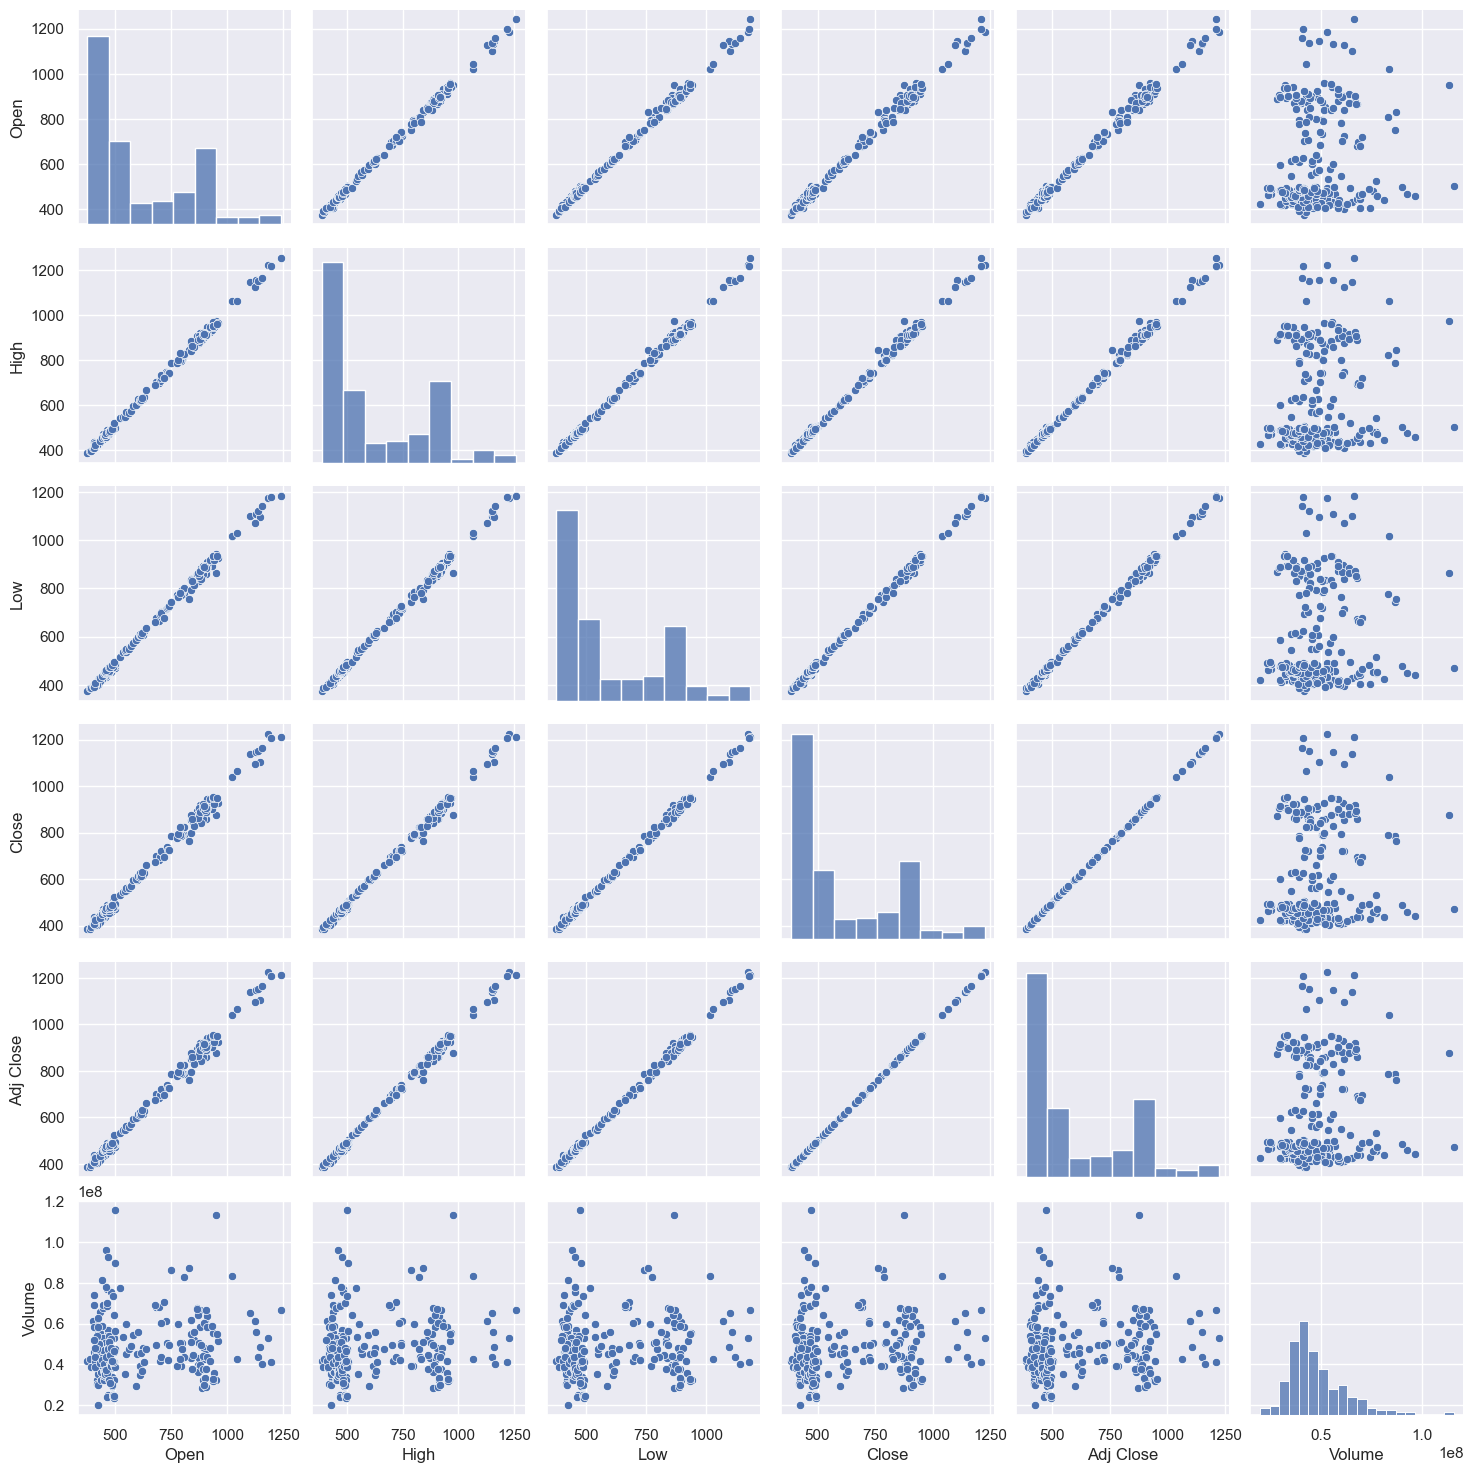

In [14]:
sns.pairplot(df)


In [15]:
#split data into training data

x = df[['High', 'Low', 'Open', 'Volume']].values
y = df['Close']

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [18]:
lm = LinearRegression().fit(x_train,y_train)
lm.coef_

array([ 7.01746406e-01,  1.00929165e+00, -6.98537024e-01,  3.68458353e-08])

In [19]:
lm.score(x_train,y_train)

0.9992559519011426

In [21]:
predictions = lm.predict(x_test)
predictions

array([ 615.78198098,  453.82453342,  733.08237226,  421.17570693,
        549.11464076,  963.92093602,  484.32100453,  888.50141137,
        460.05219982,  486.1814942 ,  542.23428653,  907.64428766,
        489.26991498,  891.45797864,  567.57712957,  418.31018933,
        904.93881763,  723.81047028,  622.06712404,  403.9288049 ,
        923.04692976,  429.21287876,  952.57107126,  496.31426954,
        494.42672096, 1205.29091548,  424.19711824,  455.82064063,
        894.63482296,  436.64744564, 1081.84852185,  464.81461166,
        485.26730921,  796.73393342,  705.0906855 ,  493.50390023,
        890.56023922,  428.92824867,  436.48752631,  897.49614087,
        457.72283277,  414.51622879,  895.5850972 ,  795.07103618,
        433.70217565,  474.21529187,  952.69945876,  410.59856415,
        445.82868543,  786.82837293,  426.29012977])

In [23]:
x_train , y_train = np.array(x_train), np.array(y_train)


In [25]:
dframe = pd.DataFrame({'actual': y_test, 'Predicted': predictions })

Text(0, 0.5, 'Predicted')

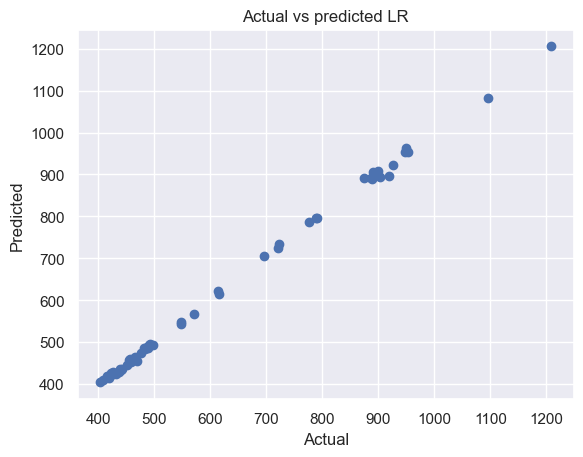

In [30]:
#graph predicted vs actual results 
fig = plt.figure()
plt.scatter(y_test, predictions)
plt.title('Actual vs predicted LR')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [31]:
#calculate accurary of model with RMSE MSE and meanl abs
from sklearn import metrics

print('Mean Abs value: ', metrics.mean_absolute_error(y_test, predictions))
print('Mean squared value: ', metrics.mean_squared_error(y_test, predictions))
print('root mean squared error value: ', math.sqrt(metrics.mean_squared_error(y_test, predictions)))

from sklearn.metrics import r2_score
r2_score(y_test, predictions)

Mean Abs value:  5.56803048962318
Mean squared value:  51.88047148668369
root mean squared error value:  7.202809971579404


0.9989253358831343